In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lls import LinearLeastSquare

In [13]:
data = pd.read_csv("HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [14]:
data["Price(USD)"] = data["Price"] / 61000
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,30327.868852
1,60,1,True,True,True,Shahran,1850000000,30327.868852
2,79,2,True,True,True,Pardis,550000000,9016.393443
3,95,2,True,True,True,Shahrake Qods,902500000,14795.081967
4,123,2,True,True,True,Shahrake Gharb,7000000000,114754.098361


In [15]:
top_5_expensive_houses = data.nlargest(5, 'Price')
print("Top 5 most expensive houses:")
print(top_5_expensive_houses[['Address', 'Price']])

Top 5 most expensive houses:
         Address        Price
1612  Zaferanieh  92400000000
1711      Abazar  91000000000
406      Lavasan  85000000000
773   Ekhtiarieh  81600000000
1254    Niavaran  80500000000


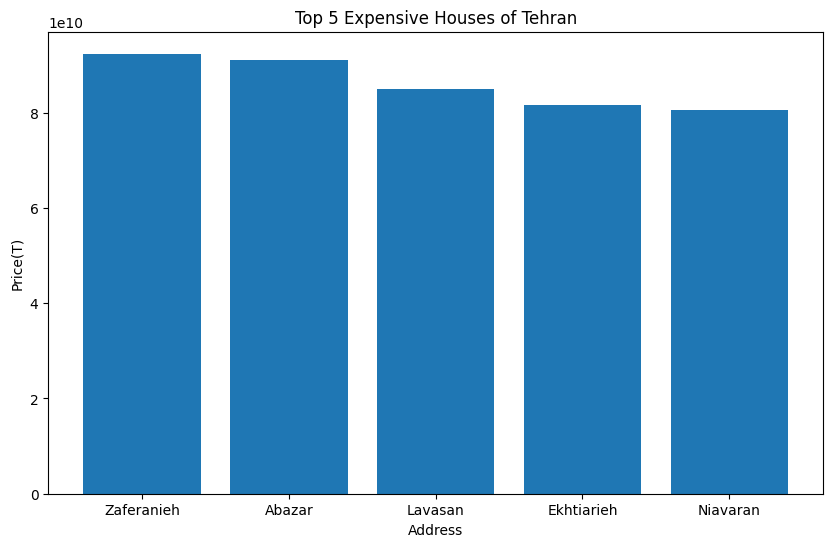

In [21]:
plt.figure(figsize= (10, 6))
plt.bar(top_5_expensive_houses["Address"], top_5_expensive_houses["Price"], )
plt.title("Top 5 Expensive Houses of Tehran")
plt.xlabel("Address")
plt.ylabel("Price(T)")
plt.show()

In [22]:
X = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']].copy()
X['Parking'] = X['Parking'].astype(int)
X['Warehouse'] = X['Warehouse'].astype(int)
X['Elevator'] = X['Elevator'].astype(int)
y = data['Price']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2612, 5)
(653, 5)
(2612,)
(653,)


In [24]:
lss = lls = LinearLeastSquare()

In [27]:
lls.fit(X_train.values, Y_train.values)

In [29]:
Y_pred = lls.predict(X_test.values)

In [32]:
mae_lls = mean_absolute_error(Y_test, Y_pred)
mse_lls = mean_squared_error(Y_test, Y_pred)
rmse_lls = np.sqrt(mse_lls)

print("MAE of LLS=", mae_lls)
print("MSE of LLS=", mse_lls)
print("RMSE of LLS=", rmse_lls)

MAE of LLS= 2752430294.960467
MSE of LLS= 2.633272010867543e+19
RMSE of LLS= 5131541689.266047


In [33]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred_lr = lr_model.predict(X_test)

In [34]:
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("MAE of LinearRegression=", mae_lr)
print("MSE of LinearRegression=", mse_lr)
print("RMSE of LinearRegression=", rmse_lr)

MAE of LinearRegression= 2764734571.806896
MSE of LinearRegression= 2.4278830228932014e+19
RMSE of LinearRegression= 4927355297.6147375
